#### Assignment 2 : Fitting and Alignment
#### Name : Jayasinghe D.R.
#### Index No. : 190262L

Question 1

In [142]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape( half_n, 1), y.reshape(half_n, 1)))



<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

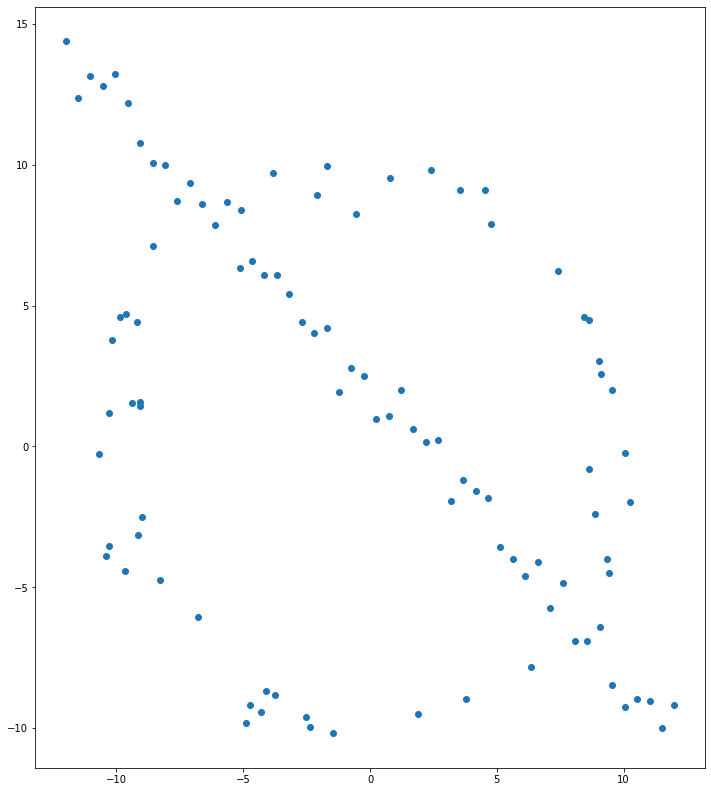

In [167]:
m, b = -1, 2
x = np.linspace (-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1 )))

X = np.vstack((X_circ, X_line))

a = X[:,0] #1st column
b = X[:,1] #2nd column

#plotting the data set
plt.figure(figsize=(12, 14))
plt.plot(a, b, 'o')
plt.plot


In [135]:
def findCircle(pt1, pt2, pt3):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]
    x3, y3 = pt3[0], pt3[1]

    #detect if it is circle
    #if not (((y3 - y2)/(x3 - x2)) == ((y2 - y1)/(x2 - x1))):

    #circle equation 
    # x**2 + y**2 + 2gx + 2fy + c = 0
    a1 = x1 - x2
    a2 = x1 - x3

    b1 = y1 - y2
    b2 = y1 - y3

    c1 = (x2**2 - x1**2 + y2**2 - y1**2)/2
    c2 = (x3**2 - x1**2 + y3**2 - y1**2)/2

    A = np.array([[a1, b1], [a2, b2]], dtype=np.float32)
    C = np.array([[c1], [c2]], dtype=np.float32)

    g_f = np.linalg.pinv(A) @ C
    g = -g_f[0][0]
    f = -g_f[1][0]
    c = -(x1**2 + y1**2  + 2*g*x1 + 2*f*y1)
    
    r_sqaured = g**2 + f**2 - c

    if (r_sqaured > 0):
        #r = np.sqrt(r_sqaured)
        #print(g, f, r)
        r1 = np.sqrt((x1-g)**2 + (y1-f)**2)
        r2 = np.sqrt((x2-g)**2 + (y2-f)**2)
        r3 = np.sqrt((x3-g)**2 + (y3-f)**2)
        r = np.mean([r1, r2, r3])
        #print(r1, r2, r3)

        return (g, f, r)


In [136]:
def plotCircle(x, y, r):
    plt.figure(figsize=(10, 10))
    #plt.plot([x1, x2, x3, g], [y1, y2, y3, f], 'o') 
    theta = np.linspace( 0 , 2 * np.pi , 150 )
    p = x + r * np.cos( theta )
    q = y + r * np.sin( theta)
    plt.plot(p, q, color='r')
    plt.show


45
[0.30881742, -0.5334554, 9.932342150836428]


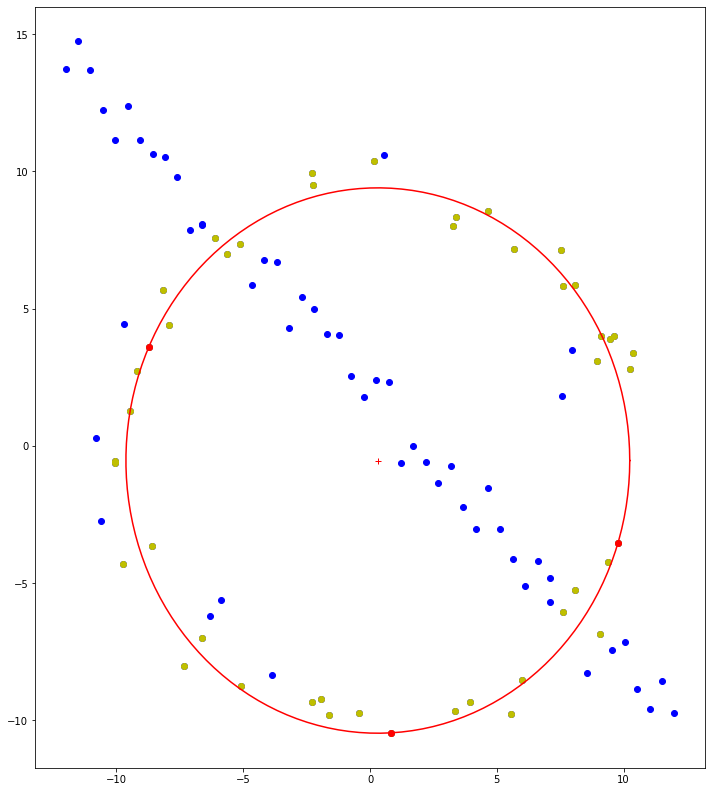

In [166]:
#randomly select 3 samples for 35 times
pt_arr = []
best_pts = np.array([[0, 0], [0, 0], [0, 0]])
inliers = []
max_count = 0
pt_count = 0
new_circle = np.array([0, 0, 0])
t = 1

for i in range(35):
    index = np.random.choice(X.shape[0], 3, replace=False) 
    ran_pts = X[index]
    a, b, r = findCircle(ran_pts[0], ran_pts[1], ran_pts[2])

    #inner thershold
    
    in_t = r - t
    out_t = r + t

    for pt in X:
        x, y = pt[0], pt[1]
        r_cal = np.sqrt((x-a)**2 + (y-b)**2)
        if (in_t < r_cal < out_t):
            pt_count += 1
            pt_arr.append(pt)

    if pt_count > max_count:
        max_count = pt_count
        new_circle = [a, b, r]
        best_pts = ran_pts
        inliers = pt_arr

    pt_count = 0
    pt_arr = []

#consensus datasize
d = 40



print(max_count)
print(new_circle)

#parameters of the RANSAC circle
x_0, y_0, r_0 = new_circle[0], new_circle[1], new_circle[2]

if (max_count >= d):
    plt.figure(figsize=(12, 14))

    #plotting the data set
    a = X[:,0] #1st column
    b = X[:,1] #2nd column
    plt.plot(a, b, 'o', color='b')

    #plot inliers
    inliers = np.array(inliers)
    inlier_x = inliers[:,0]
    inliers_y = inliers[:,1]
    plt.plot(inlier_x, inliers_y, 'o', color='y')

    #plotting the RANSAC circle
    theta = np.linspace( 0 , 2 * np.pi , 150 )
    p = x_0 + r_0 * np.cos( theta )
    q = y_0 + r_0 * np.sin( theta)
    plt.plot(p, q, color='r')

    #plot centre
    plt.plot(x_0, y_0, '+', color='r')

    #best points
    best_x = best_pts[:,0]
    best_y = best_pts[:,1]
    plt.plot(best_x, best_y, 'o', color='r')


    
    
    plt.show()

